<div style="text-align: center; background-color: #8ABEB9; padding: 10px;">
    <h2 style="font-weight: bold;">RESTAURANTS DATA ANALYSIS - RESTORAN VERİ ANALİZİ</h2>
</div>

In [11]:
# Modüler yükleme

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # plot stil için
from scipy import stats

plt.rcParams['figure.figsize']=[15,8]
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

from sklearn.model_selection import RandomizedSearchCV
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree

from xgboost import XGBRegressor
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings

warnings.filterwarnings('ignore')


<div style="text-align: center; background-color: #8ABEB9; padding: 10px;">
    <h2 style="font-weight: bold;">LOADING DATASET - VERİ KÜMESİ YÜKLENİYOR</h2>
</div>

In [12]:
df = pd.read_csv('/kaggle/input/restaurant-reviews/Restaurant reviews.csv')

In [13]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [14]:
df.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,NaN
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,NaN
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,NaN
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,NaN
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6,NaN


#### Eğer veri kümesi 'NaN', 'N/A', 'NA', 'n/a', 'n.a.', 'N#A', 'n#a', '?' değerlerini içeriyorsa, bunları Null ile değiştirmemiz gerekir.

In [15]:
df.replace(['NaN', 'N/A', 'NA', 'n/a', 'n.a.', 'N#A', 'n#a', '?'], 'other', inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [17]:
df.shape

(10000, 8)

## Sayısal değişkenlerin özet istatistikleri:

In [18]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Pictures,10000.0,0.75,2.57,0.0,0.0,0.0,0.0,64.0
7514,1.0,2447.00,NaN,2447.0,2447.0,2447.0,2447.0,2447.0


In [19]:
df.describe(include="all").T.round(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0
7514,1.0,NaN,NaN,NaN,2447.0,NaN,2447.0,2447.0,2447.0,2447.0,2447.0


In [20]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()                           
print('Sayısal değişkenler:', numerical_vars)
print('Kategorik değişkenler:', categorical_vars)

Sayısal değişkenler: ['Pictures', '7514']
Kategorik değişkenler: ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time']


In [21]:
# Kategorik ve sayısal değişkenlerin sayısını sayıma

categorical_count = df.select_dtypes(include='object').shape[1]
numerical_count = df.select_dtypes(exclude='object').shape[1]

print(f"Kategorik değişkenlerin sayısı: {categorical_count}")
print(f"Sayısal değişkenlerin sayısı: {numerical_count}")

Kategorik değişkenlerin sayısı: 6
Sayısal değişkenlerin sayısı: 2


In [22]:
# Kategorik özellikler için benzersiz (unique) değerler

print(df.select_dtypes(include=['object']).nunique())

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
dtype: int64


## Missing Value - Kayıp Değeri

In [23]:
missing_df =  df.isnull().sum().to_frame().rename(columns={0:"Kayıp Değerlerin Toplam Sayısı"})
missing_df["% Kayıp Değerlerin"] = round((missing_df["Kayıp Değerlerin Toplam Sayısı"]/len( df))*100,2)
missing_df

,Kayıp Değerlerin Toplam Sayısı,% Kayıp Değerlerin
Restaurant,0,0.00
Reviewer,38,0.38
Review,45,0.45
Rating,38,0.38
Metadata,38,0.38
Time,38,0.38
Pictures,0,0.00
7514,9999,99.99


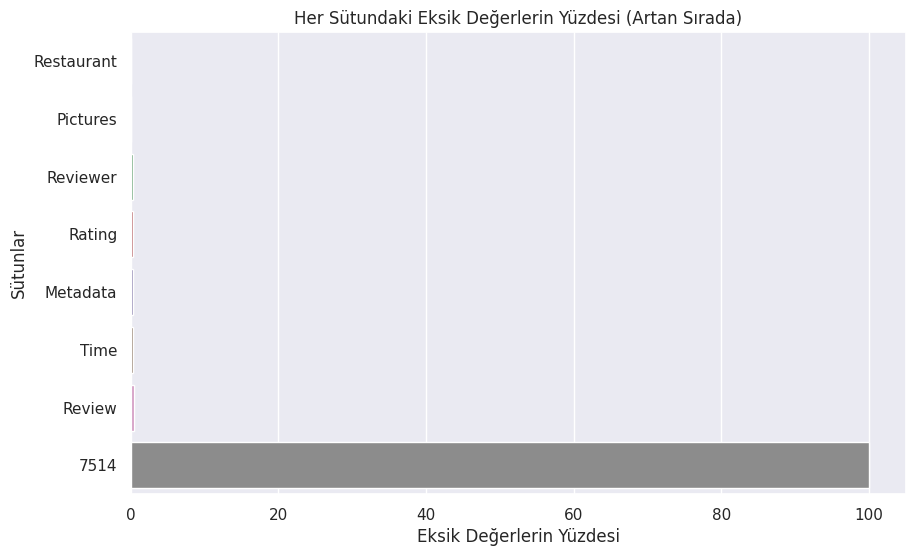

In [24]:
# Her sütun için eksik değerlerin yüzdesini hesaplaması
missing_values_percentage = df.isnull().mean() * 100

# Şimdi eksik değerleri sıralayabilir ve görselleştirebilirsiniz
missing_values_percentage_sorted = missing_values_percentage.sort_values()

# Görselleştirme kodu
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_percentage_sorted, y=missing_values_percentage_sorted.index)
plt.title('Her Sütundaki Eksik Değerlerin Yüzdesi (Artan Sırada)')
plt.xlabel('Eksik Değerlerin Yüzdesi')
plt.ylabel('Sütunlar')
plt.show()

<Axes: >

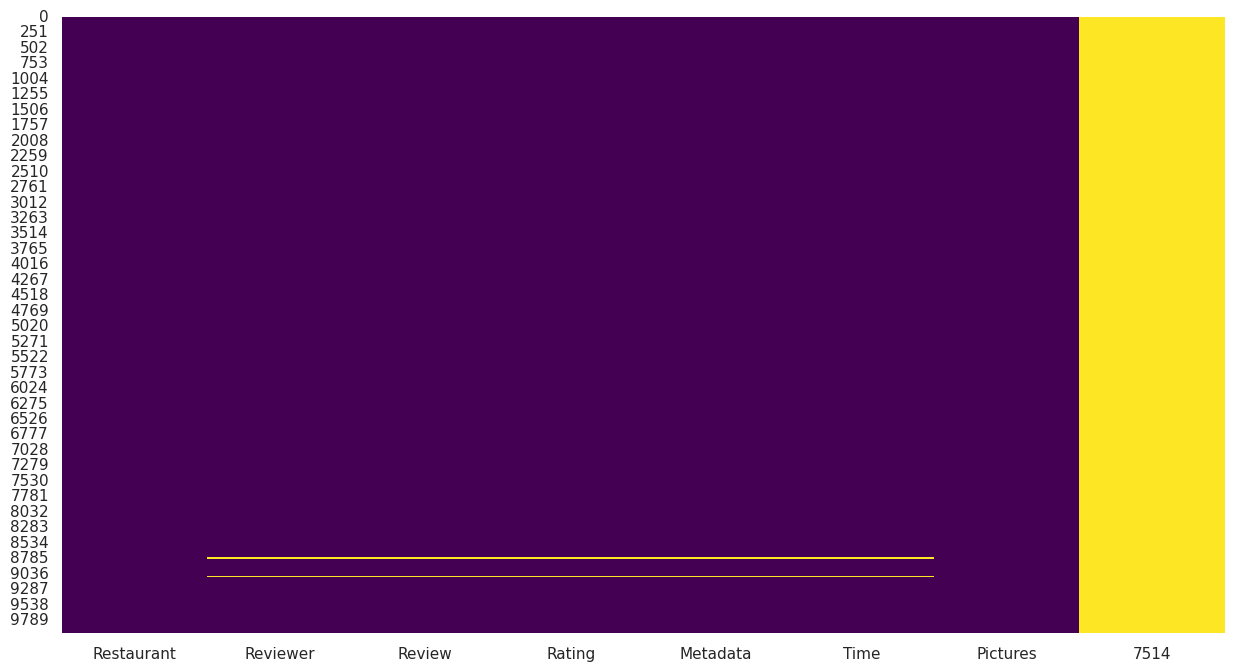

In [25]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [26]:
# Kayıp değerlerin işlenmesi

# Sürekli değişkenler için ortalama ve kategorik değişkenler için mod ile kayıp değerlerin girilmesi

for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

# Tahminden önce eksik değerlerin kontrol edilmesi
missing_values = df.isnull().sum()

# Tahminden sonra eksik değerlerin yeniden kontrol edilmesi
missing_values_after = df.isnull().sum()

(missing_values, missing_values_after)

(Restaurant    0
 Reviewer      0
 Review        0
 Rating        0
 Metadata      0
 Time          0
 Pictures      0
 7514          0
 dtype: int64,
 Restaurant    0
 Reviewer      0
 Review        0
 Rating        0
 Metadata      0
 Time          0
 Pictures      0
 7514          0
 dtype: int64)

In [27]:
missing_df =  df.isnull().sum().to_frame().rename(columns={0:"Kayıp Değerlerin Toplam Sayısı"})
missing_df["% Kayıp Değerlerin"] = round((missing_df["Kayıp Değerlerin Toplam Sayısı"]/len( df))*100,2)
missing_df

,Kayıp Değerlerin Toplam Sayısı,% Kayıp Değerlerin
Restaurant,0,0.0
Reviewer,0,0.0
Review,0,0.0
Rating,0,0.0
Metadata,0,0.0
Time,0,0.0
Pictures,0,0.0
7514,0,0.0


### Duplicate Value - Yinelenen Değer

In [28]:
df[df.duplicated(keep=False)]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
8777,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0,2447.0
8778,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0,2447.0
8779,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0,2447.0
8780,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0,2447.0
8781,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0,2447.0
8782,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0,2447.0
8783,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0,2447.0
8784,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0,2447.0
8785,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0,2447.0
8786,American Wild Wings,Ankita,good,5,1 Review,5/14/2019 23:44,0,2447.0


In [29]:
df.duplicated().sum()

36

In [31]:
# DataFrame'den yinelenen satırları silme

df.drop_duplicates(inplace=True)

In [32]:
df.shape

(9964, 8)

In [33]:
# Gerekli olmayan özellikleri denetle

df.nunique().sort_values()

7514             1
Rating          10
Pictures        36
Restaurant     100
Metadata      2477
Reviewer      7446
Review        9364
Time          9782
dtype: int64

In [34]:
import numpy as np

# Sayısal olmayan değerleri NaN ile değiştirin
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Alternatif olarak, sayısal olmayan değerleri varsayılan bir değerle değiştirebilirsiniz
# df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce').fillna(default_value)

# Şimdi, "Rating" sütununu yüzen değere dönüştür
df['Rating'] = df['Rating'].astype(float)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9964 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9964 non-null   object 
 1   Reviewer    9964 non-null   object 
 2   Review      9964 non-null   object 
 3   Rating      9963 non-null   float64
 4   Metadata    9964 non-null   object 
 5   Time        9964 non-null   object 
 6   Pictures    9964 non-null   int64  
 7   7514        9964 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 700.6+ KB


<div style="text-align: center; background-color: #8ABEB9; padding: 10px;">
    <h2 style="font-weight: bold;">EXPLORATORY DATA ANALYSIS - KEŞİF VERİ ANALİZİ </h2>
</div>

## Univariate Analysis - Tek Değişkenli Analiz

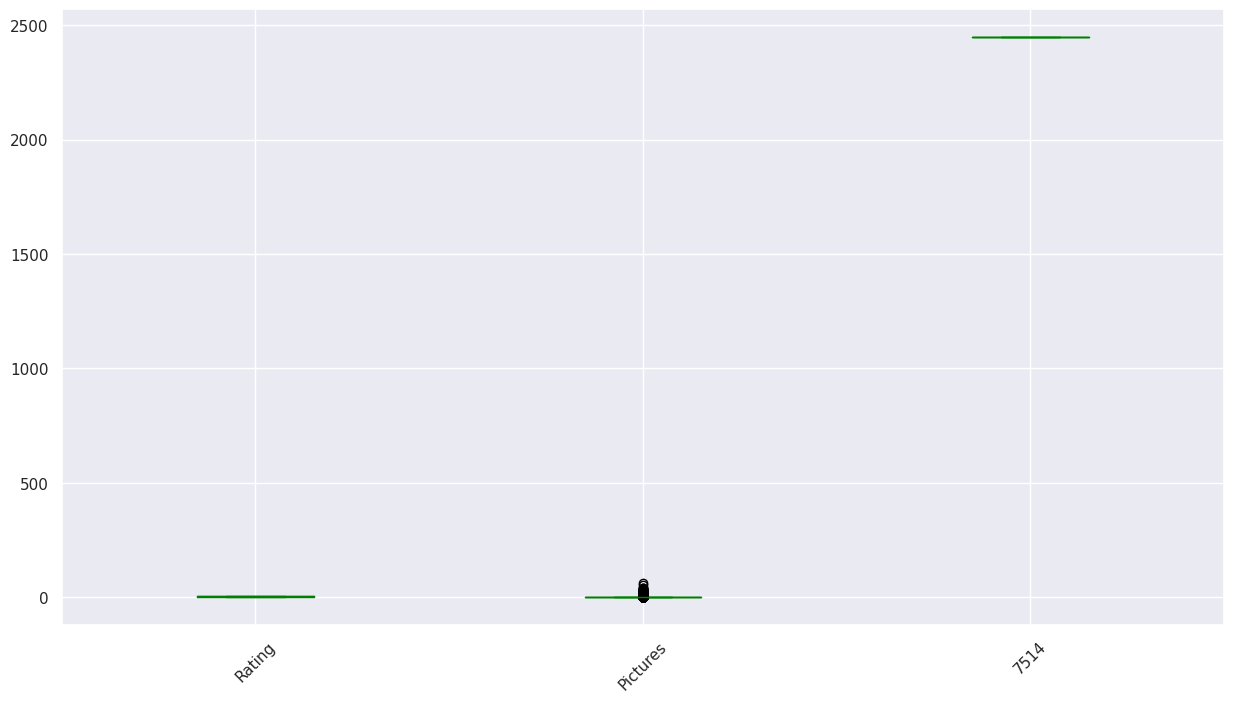

In [36]:
# Döndürülmüş metin etiketleriyle kutu grafiğini çizin
df.plot(kind='box', rot=45,color='green')

# plot göster
plt.show()

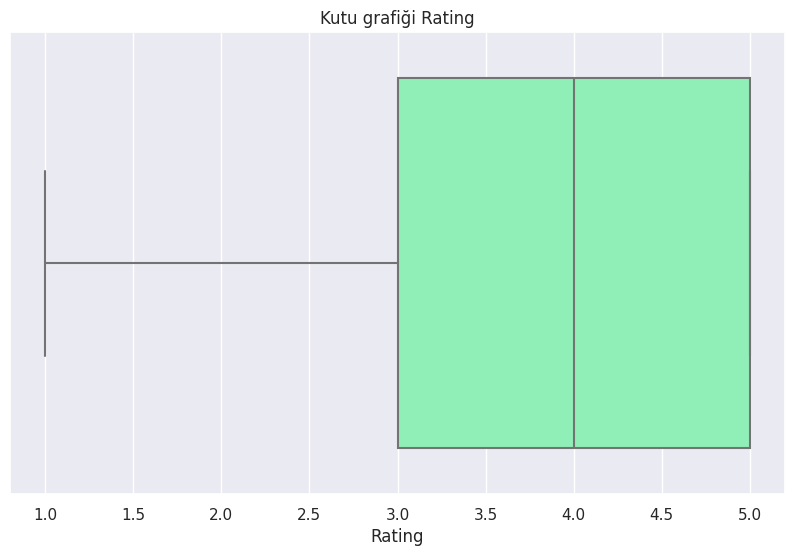

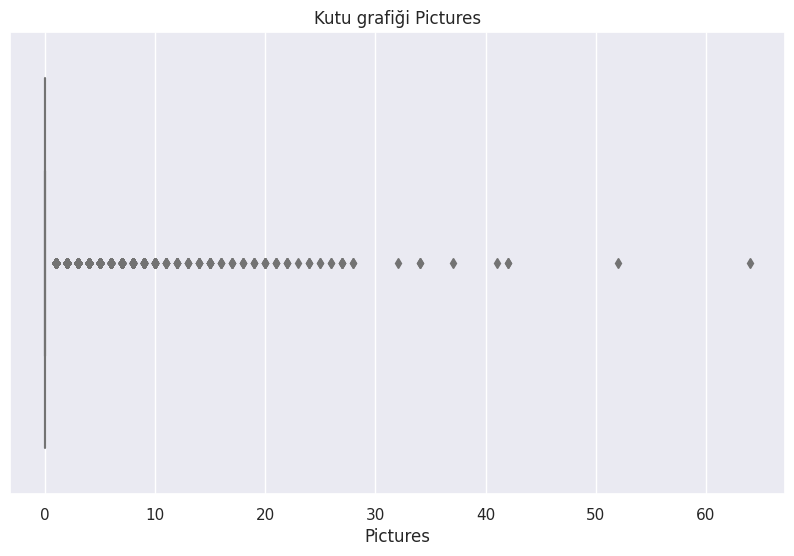

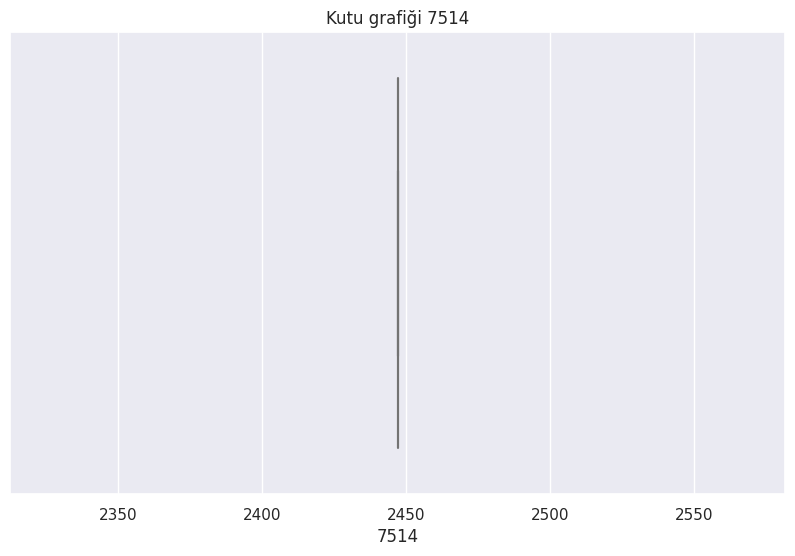

In [37]:
# Sayısal sütunları filtrele
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Her sayısal özellik için aykırı değerleri belirlemek amacıyla kutu grafikleri çiziliyor
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column],palette='rainbow')
    plt.title(f'Kutu grafiği {column}')
    plt.show()

## Multivariate Analysis - Çok Değişkenli Analiz

Text(0.5, 1.0, 'Korelasyon Matrisi')

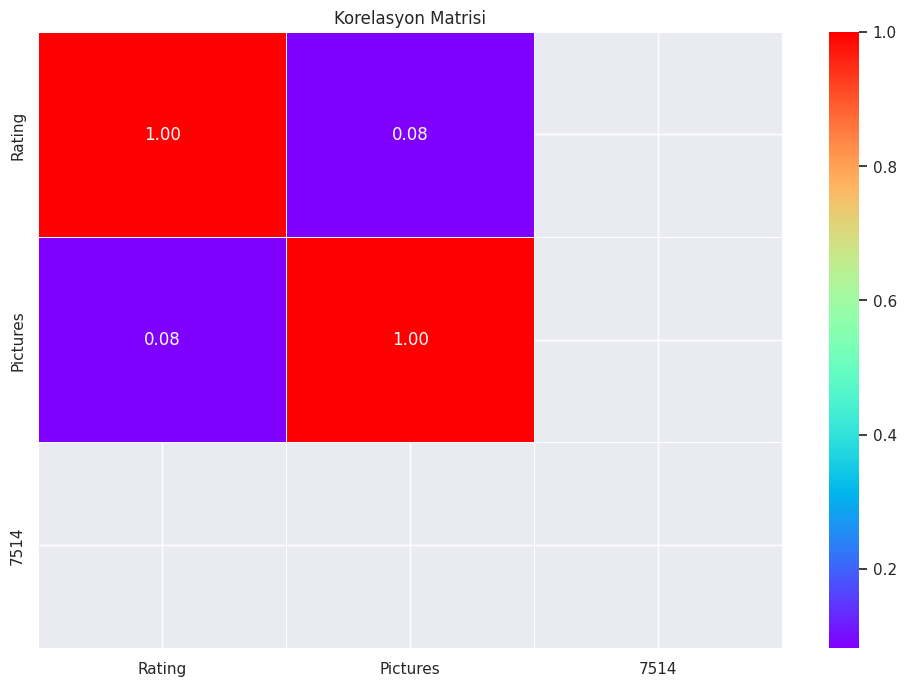

In [38]:
# Korelasyon matrisi

# DataFrame'den yalnızca sayısal sütunları seçin
numeric_columns = df.select_dtypes(include=['number'])

# Korelasyon matrisini hesaplayın
correlation_matrix = numeric_columns.corr()

# Korelasyonları görselleştirmek için bir ısı haritası oluşturun
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Korelasyon Matrisi')

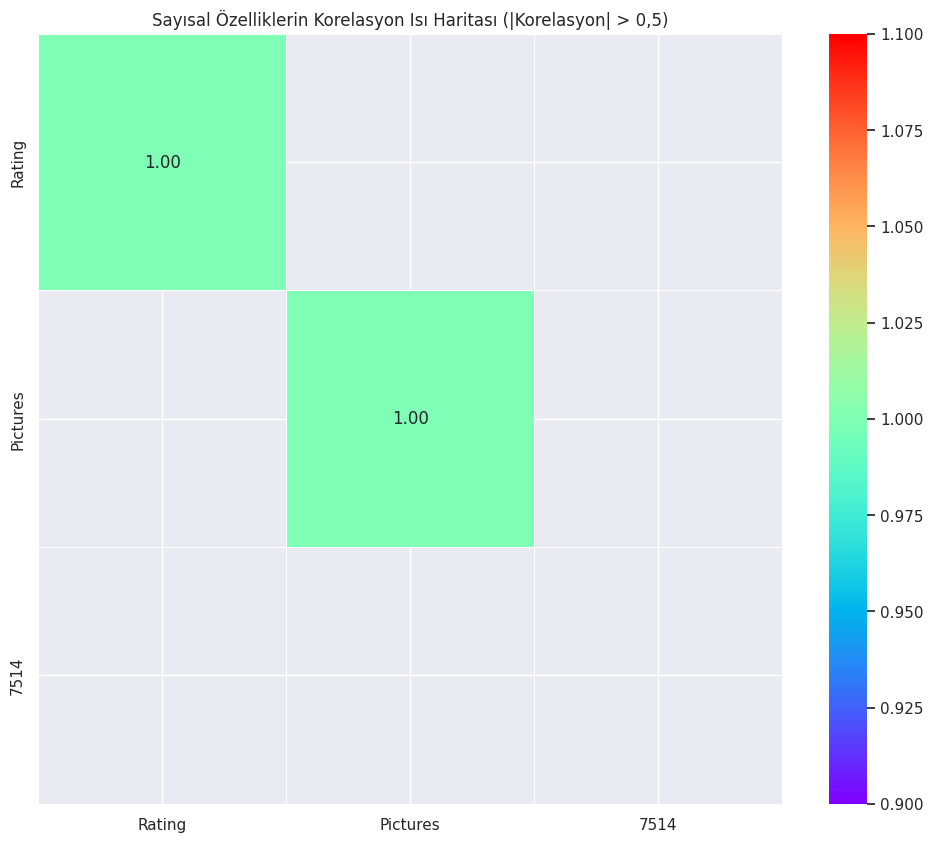

In [39]:
# Isı Haritası Çizimi
# Yalnızca sayısal sütunları seç
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Korelasyon matrisini hesaplayın
corr_matrix = numeric_columns.corr()

# 0,5'ten büyük veya -0,5'ten küçük değerleri içerecek şekilde korelasyon matrisini filtrele
corr_matrix_filtered = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

# Isı haritasını filtrelenmiş korelasyon değerleriyle çizin
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Sayısal Özelliklerin Korelasyon Isı Haritası (|Korelasyon| > 0,5)')
plt.show()

In [40]:
# Sütun başına benzersiz değer sayısı.

df.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating           9
Metadata      2477
Time          9782
Pictures        36
7514             1
dtype: int64

In [41]:
# 'Rating' için benzersiz değerleri ve sıklığı kontrol edin

df['Rating'].value_counts()

Rating
5.0    3834
4.0    2373
1.0    1735
3.0    1193
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: count, dtype: int64

In [42]:
# "Like" dizesini, Rating sütunundaki en sık görülen değer olan '5' ile değiştirin.

df['Rating'] = df['Rating'].replace(['Like'], '5')

In [43]:
# 'Rating' sütun türünü 'float' olarak değiştirelim.

df['Rating'] = df['Rating'].astype(float)

In [44]:
# Derecelendirme - Maksimum ve Minimum değer

print("Maximum: " + str(df['Rating'].max()))
print("Minimum: " + str(df['Rating'].min()))

Maximum: 5.0
Minimum: 1.0


In [45]:
# 'Rating' Benzersiz değerleri ve sıklığı kontrol edin

df['Rating'].value_counts()

Rating
5.0    3834
4.0    2373
1.0    1735
3.0    1193
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: count, dtype: int64

In [46]:
df['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5, nan])

In [47]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,2447.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2447.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,2447.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,2447.0


## Outlier Treatment - Aykırı Değer Tedavisi

Kaldırılan aykırı değer sayısı: 1984


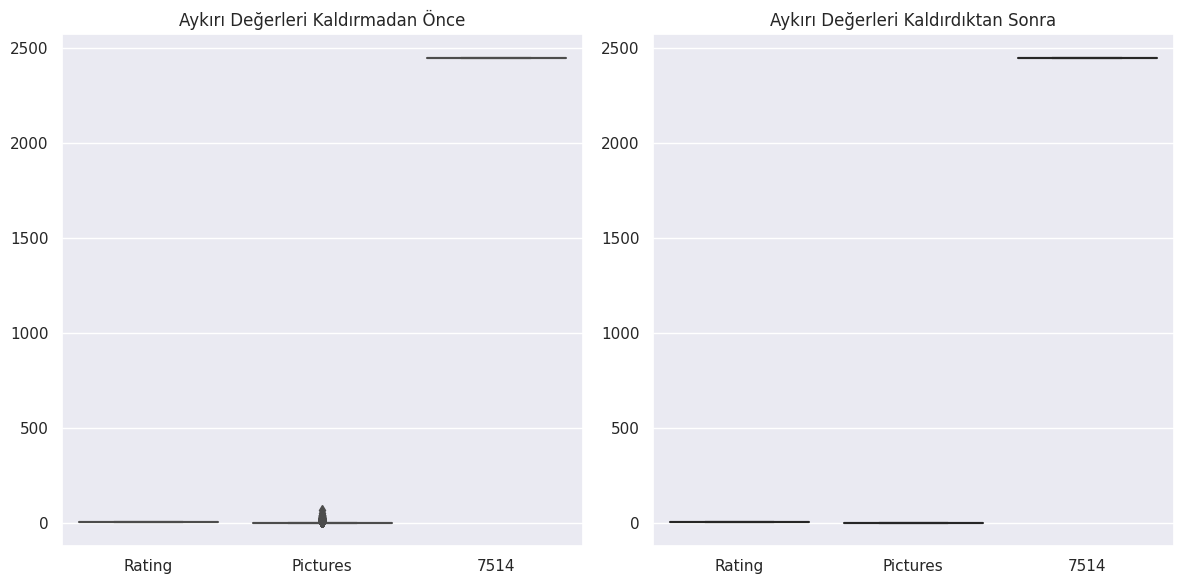

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Örnek Veri Çerçevesi (bunu gerçek Veri Çerçevenizle değiştirin)
# df = ...

# IQR yöntemini kullanarak aykırı değerleri kaldırma işlevi
def remove_outliers_iqr(df):
    # Yalnızca sayısal sütunları seç
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    
    # İlk çeyreği (Q1) ve üçüncü çeyreği (Q3) hesaplayın
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    
    # Çeyrekler arası aralık (IQR)
    IQR = Q3 - Q1
    
    # Aykırı değer tespiti için alt ve üst sınırları tanımlayın
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Aykırı değerleri belirleyin
    outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)
    
    # Kaldırılan aykırı değerlerin sayısını sayın
    num_outliers_removed = outliers.sum()
    
    # Aykırı değerler olmadan satırlara göre Veri Çerçevesini filtrele
    df_no_outliers = df[~outliers]
    
    return df_no_outliers, num_outliers_removed

# IQR yöntemini kullanarak aykırı değerleri kaldırın ve kaldırılan aykırı değerlerin sayısını alın
df_no_outliers, num_outliers_removed = remove_outliers_iqr(df)

print("Kaldırılan aykırı değer sayısı:", num_outliers_removed)

# Aykırı değerleri kaldırmadan önce ve sonra kutu grafiklerini çizmek için işlev
def plot_boxplots_before_after(df_before, df_after):
    # Şekli ayarlayın
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    # Aykırı değerleri kaldırmadan önceki kutu grafiği (mavi renk)
    sns.boxplot(data=df_before, ax=axes[0], color='blue')
    axes[0].set_title('Aykırı Değerleri Kaldırmadan Önce')
    
    # Aykırı değerleri kaldırdıktan sonraki kutu grafiği (yeşil renk)
    sns.boxplot(data=df_after, ax=axes[1], color='green')
    axes[1].set_title('Aykırı Değerleri Kaldırdıktan Sonra')
    
    # Düzeni ayarla
    plt.tight_layout()
    plt.show()

# Aykırı değerlerin kaldırılmasından önce ve sonra kutu grafiklerini çizin
plot_boxplots_before_after(df, df_no_outliers)

<div style="text-align: center; background-color: #8ABEB9; padding: 10px;">
    <h2 style="font-weight: bold;">LABEL ENCODING - ETİKET KODLAMA</h2>
</div>

### Segregate Categorical and Numerical Columns - Kategorik ve Sayısal Sütunları Ayırın

In [51]:
catcol = []
numcol = []

for col in df.columns:
    if df[col].dtype == 'object':
        catcol.append(col)
    else:
        numcol.append(col)

In [52]:
print("Kategorik Sütunlar:",catcol)
print("Sayısal Sütunlar:", numcol)

Kategorik Sütunlar: ['Restaurant', 'Reviewer', 'Review', 'Metadata', 'Time']
Sayısal Sütunlar: ['Rating', 'Pictures', '7514']


In [53]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in catcol:
    df[col] = encoder.fit_transform(df[col])

In [54]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,16,4976,5984,5.0,46,6480,0,2447.0
1,16,766,516,5.0,1238,6465,0,2447.0
2,16,955,185,5.0,792,6434,0,2447.0
3,16,6595,5694,5.0,22,6427,0,2447.0
4,16,1617,1747,5.0,1238,6423,0,2447.0


<div style="text-align: center; background-color: #8ABEB9; padding: 10px;">
    <h2 style="font-weight: bold;">DATA SCALING - VERİ ÖLÇEKLENDİRME</h2>
</div>

In [55]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

for col in numcol:
    df[[col]] = scale.fit_transform(df[[col]])

In [56]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,16,4976,5984,1.0,46,6480,0.0,0.0
1,16,766,516,1.0,1238,6465,0.0,0.0
2,16,955,185,1.0,792,6434,0.0,0.0
3,16,6595,5694,1.0,22,6427,0.0,0.0
4,16,1617,1747,1.0,1238,6423,0.0,0.0


In [57]:
x = df.drop('Review',axis=1)
y = df['Review']

<div style="text-align: center; background-color: #8ABEB9; padding: 10px;">
    <h2 style="font-weight: bold;">TRAIN & TEST AYRIMI</h2>
</div>

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,shuffle = True,random_state=42)

In [59]:
# Print the shapes of the resulting sets
print("Eğitim seti şekli:", x_train.shape, y_train.shape)
print("Test seti şekli:", x_test.shape, y_test.shape)

Eğitim seti şekli: (6974, 7) (6974,)
Test seti şekli: (2990, 7) (2990,)


In [60]:
x_train

,Restaurant,Reviewer,Rating,Metadata,Time,Pictures,7514
468,64,4426,0.75,854,6136,0.000000,0.0
1545,47,4799,0.25,21,9343,0.000000,0.0
6255,78,1046,1.00,22,7931,0.000000,0.0
2683,61,4150,0.50,153,2540,0.000000,0.0
8089,81,2077,1.00,1543,8170,0.000000,0.0
...,...,...,...,...,...,...,...
5734,15,4352,0.25,21,9722,0.000000,0.0
5191,40,4624,1.00,0,8118,0.000000,0.0
5390,28,2126,0.75,1521,7040,0.000000,0.0
860,45,2141,0.50,1737,5344,0.015625,0.0


In [61]:
x_test

,Restaurant,Reviewer,Rating,Metadata,Time,Pictures,7514
5229,17,4175,1.00,1290,2189,0.000000,0.0
9903,20,878,0.25,1791,5055,0.000000,0.0
6176,71,1022,0.75,913,2574,0.000000,0.0
7541,72,922,0.25,21,8634,0.000000,0.0
1208,4,2261,0.00,1796,5907,0.000000,0.0
...,...,...,...,...,...,...,...
6060,70,3080,1.00,655,3407,0.000000,0.0
6064,70,2182,1.00,415,3268,0.140625,0.0
6389,27,1313,0.50,1521,7041,0.000000,0.0
5145,40,359,1.00,21,1187,0.000000,0.0


In [62]:
y_train

468     5475
1545    8349
6255    8565
2683    8070
8089    2339
        ... 
5734    9229
5191    8565
5390    1181
860     6573
7270     277
Name: Review, Length: 6974, dtype: int64

In [63]:
y_test

5229    2162
9903    5168
6176    4807
7541    5072
1208    3586
        ... 
6060    3979
6064    5320
6389     544
5145    8597
5216    4085
Name: Review, Length: 2990, dtype: int64

<div style="text-align: center; background-color: #8ABEB9; padding: 10px;">
    <h2 style="font-weight: bold;">MODEL BUILDING - Model Kurumu</h2>
</div>

In [65]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [66]:
models = {
            "Linear Regression" : LinearRegression(),
            "Lasso" : Lasso(),
            "Ridge" : Ridge(),
            "k-Neighbors Regression" : KNeighborsRegressor(),
            "Decision Tree" : DecisionTreeRegressor(),
            "Random Forest Regressor" : RandomForestRegressor(n_estimators = 100, random_state = 0),
            "AdaBoost Regressor" :AdaBoostRegressor(),
            "XGBRegressor" : XGBRegressor()
        }

In [67]:
import xgboost as xgb

# XGBoost Regresörünü örneklendirin
model = xgb.XGBRegressor()

# Modeli eğitim verilerine uydurma
model.fit(x_train, y_train)

# Test verileri üzerinde tahminlerde bulunun
y_test_pred = model.predict(x_test)

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Değerlendirme metriklerini hesapla
mae = mean_absolute_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

# Değerlendirme ölçümlerini yazdır
print("Ortalama Mutlak Hata:", mae)
print("Karekök ortalama hata:", rmse)
print("R2 skoru:", r2)

Ortalama Mutlak Hata: 2308.4682237759084
Karekök ortalama hata: 2752.3487170422877
R2 skoru: -0.009548434747745471
